# Covid-19 Chest X-Ray


# **Alunos**

*   André Dorte dos Santos
*   Luís Henrique Monteiro Saia Cereda
*   Luiz Massao Miyazaki
*   Maurício Pereira Lopes


# Carregamento dos Dados

O código abaixo irá carregar o seu Drive no colab, o diretorio onde está o DataSet do COVID-19 é o seguinte:

**/content/drive/My Drive/COVID-19/**

In [1]:
# imports

import os
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.utils import get_file
import csv
import random
import pandas as pd
import tensorflow as tf
from tensorflow.keras import callbacks

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Verificando se o diretório que será utilizado existe e contêm os arquivos necessários.

In [7]:
!ls drive/My\ Drive/COVID-19/

test  test.csv	train  train.csv


# Pré Processamento

In [8]:
#*** Função que retorna nomes dos arquivos, seguidos das classes, balanceadas
def getBalancedFilenamesAndClasses(csvDirPath):

  csvRows= pd.read_csv(csvDirPath)

  validation_split = 0.2

  # Separa os dados de treino
  from sklearn.model_selection import train_test_split
  train, val = train_test_split(csvRows, test_size=validation_split, shuffle=True, stratify = csvRows['class'])

  return train, val

In [9]:
imgDirPath = "/content/drive/My Drive/COVID-19/train/"
csvPath = "/content/drive/My Drive/COVID-19/train.csv"

In [10]:
train_data, val_data = getBalancedFilenamesAndClasses(csvPath)

In [11]:
train_data

,ID,file,class,dataset
6255,c5e3712c-3957-4768-be7f-dc31850d33ad,c5e3712c-3957-4768-be7f-dc31850d33ad.png,normal,rsna
2368,59c74e8a-eefe-4f92-85b1-87f0d1bd34ae,59c74e8a-eefe-4f92-85b1-87f0d1bd34ae.png,normal,rsna
5022,a1232a0d-19ec-41a6-9f93-c64bb3c44340,a1232a0d-19ec-41a6-9f93-c64bb3c44340.png,normal,rsna
1620,42e817c7-5443-488c-8412-8b2ce2911e93,42e817c7-5443-488c-8412-8b2ce2911e93.png,normal,rsna
4858,9c82ec7d-d2dc-4dfa-8630-910cb1dfd2c6,9c82ec7d-d2dc-4dfa-8630-910cb1dfd2c6.png,normal,rsna
...,...,...,...,...
11833,af8a9a3f-9487-454b-8ee6-65c9554f3a87,af8a9a3f-9487-454b-8ee6-65c9554f3a87.png,pneumonia,rsna
6929,db750e84-7776-440f-a985-84f5fbfd010b,db750e84-7776-440f-a985-84f5fbfd010b.png,normal,rsna
12336,ba96958c-acdc-46a1-9914-d0424361a07b,ba96958c-acdc-46a1-9914-d0424361a07b.png,pneumonia,rsna
9682,3fc3e7fb-1fff-4ad0-9900-8874ada57d05,3fc3e7fb-1fff-4ad0-9900-8874ada57d05.png,pneumonia,rsna


In [15]:
val_data

,ID,file,class,dataset
7789,f43b37bf-bc46-493f-8072-7d2e6be6f13b,f43b37bf-bc46-493f-8072-7d2e6be6f13b.png,normal,rsna
12818,cd79b093-d3a2-49bd-8868-b463ff05f3e8,cd79b093-d3a2-49bd-8868-b463ff05f3e8.png,pneumonia,rsna
13524,fc1fd5c7-a3cb-4073-96e2-71bd0ebd698c,fc1fd5c7-a3cb-4073-96e2-71bd0ebd698c.png,pneumonia,rsna
10459,72fd2587-d327-4e42-9e18-03479b1a18f9,72fd2587-d327-4e42-9e18-03479b1a18f9.png,pneumonia,rsna
12175,b72afa3e-644b-479a-845d-14fe8351cdb0,b72afa3e-644b-479a-845d-14fe8351cdb0.png,pneumonia,rsna
...,...,...,...,...
9899,50e589e1-e878-4994-b29f-ce9d731ac2db,50e589e1-e878-4994-b29f-ce9d731ac2db.png,pneumonia,rsna
8275,147896bf-619c-4a0f-afc3-f0459340cbb1,147896bf-619c-4a0f-afc3-f0459340cbb1.png,normal,rsna
13746,2037f6cd-d91f-47b9-ad6b-13a629090fdd,2037f6cd-d91f-47b9-ad6b-13a629090fdd.png,pneumonia,rsna
8517,05b91b32-5635-4071-b45d-6a73f8eea918,05b91b32-5635-4071-b45d-6a73f8eea918.png,pneumonia,rsna


In [13]:
!find "/content/drive/My Drive/COVID-19/train/" -type f | wc -l
!find "/content/drive/My Drive/COVID-19/test/" -type f | wc -l

13897
1579


In [14]:
batch_size = 64
train_datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    dtype=None
)

val_datagen = ImageDataGenerator()

n_epochs = 100

train_generator = train_datagen.flow_from_dataframe(
    train_data, directory=imgDirPath, x_col='file', y_col='class',
    target_size=(224, 224), class_mode='categorical', batch_size=batch_size, shuffle=True, seed=42, color_mode='rgb')

validation_generator = val_datagen.flow_from_dataframe(
    val_data, directory=imgDirPath, x_col='file', y_col='class',
    target_size=(224, 224), class_mode='categorical', batch_size=batch_size, shuffle=True, seed=42, color_mode='rgb')



Found 11118 validated image filenames belonging to 3 classes.
Found 2780 validated image filenames belonging to 3 classes.


# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state = 0, class_weight = 'balanced', kernel = 'poly', degree = 3, verbose=True)
clf.fit(x_train_vet, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
# Predição 
y_pred = clf.predict(x_val_vet)

In [ ]:
# Resultados e matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

[[54 19 17]
 [14 61 15]
 [11 16 63]]
              precision    recall  f1-score   support

           0       0.68      0.60      0.64        90
           1       0.64      0.68      0.66        90
           2       0.66      0.70      0.68        90

    accuracy                           0.66       270
   macro avg       0.66      0.66      0.66       270
weighted avg       0.66      0.66      0.66       270

0.6592592592592592


# Random Forest

In [ ]:
# Classificação
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=0, verbose=2)
print("Treinando modelo...")
clf.fit(x_train_vet, y_train) 


Treinando modelo...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=2,
                       warm_start=False)

In [ ]:
# Predição 
y_pred = clf.predict(x_val_vet)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
# Resultados e matriz de confusão
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))
print(accuracy_score(y_val, y_pred))

[[65 16  9]
 [13 72  5]
 [16 24 50]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.71        90
           1       0.64      0.80      0.71        90
           2       0.78      0.56      0.65        90

    accuracy                           0.69       270
   macro avg       0.71      0.69      0.69       270
weighted avg       0.71      0.69      0.69       270

0.6925925925925925


# ResNet50

In [16]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False)
#model.summary()

# Congela camadas pré-treinadas
for layer in model.layers:
    layer.trainable = True

# Insere novas camadas no fim da rede para classificação
full_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(3, activation='softmax')
])

#full_model.summary()

94773248/94765736 [==============================] - 1s 0us/step


In [17]:
# Instancia um otimizador SGD e compila
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.001, nesterov=True)
full_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['categorical_accuracy'])

In [18]:
# Determinando os pesos

from collections import Counter
counter = Counter(validation_generator.classes)  
max_val = float(max(counter.values()))  
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}    
class_weights 

{0: 16.768421052631577, 1: 1.0, 2: 1.4587912087912087}

In [ ]:
# Treina o modelo
save_name = "resnet50, sgd 10-3, layers travadas"
save_name = save_name + ".h5"

full_model.fit(train_generator, 
               validation_data=validation_generator, 
               batch_size=batch_size, 
               epochs=n_epochs,
               verbose = 1, 
               class_weight=class_weights,
               callbacks=[
                callbacks.ModelCheckpoint(save_name,
                    monitor = 'val_acc',
                    mode = "max",
                    save_best_only=True,
                    verbose=1),
                callbacks.EarlyStopping(monitor='val_acc', patience=10, mode = "max")    
               ])

Epoch 1/100
 55/174 [========>.....................] - ETA: 1:28:40 - loss: 0.9873 - categorical_accuracy: 0.7798

In [ ]:
# Treina modelo com Data Augmentation
batch_size = 64
epochs = 10
full_model.fit(datagen.flow(x_train, y_train_cat, batch_size=batch_size),
          steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=datagen.flow(x_val, y_val_cat, batch_size=batch_size))

Epoch 1/10
18/17 [==============================] - 15s 851ms/step - loss: 0.9134 - accuracy: 0.5883 - val_loss: 0.7198 - val_accuracy: 0.7111
Epoch 2/10
18/17 [==============================] - 14s 786ms/step - loss: 0.5621 - accuracy: 0.7937 - val_loss: 0.5823 - val_accuracy: 0.7481
Epoch 3/10
18/17 [==============================] - 14s 785ms/step - loss: 0.5091 - accuracy: 0.8024 - val_loss: 0.5577 - val_accuracy: 0.7741
Epoch 4/10
18/17 [==============================] - 14s 785ms/step - loss: 0.4852 - accuracy: 0.8111 - val_loss: 0.5337 - val_accuracy: 0.7889
Epoch 5/10
18/17 [==============================] - 14s 784ms/step - loss: 0.4452 - accuracy: 0.8303 - val_loss: 0.4801 - val_accuracy: 0.7963
Epoch 6/10
18/17 [==============================] - 14s 784ms/step - loss: 0.4370 - accuracy: 0.8216 - val_loss: 0.4913 - val_accuracy: 0.8037
Epoch 7/10
18/17 [==============================] - 14s 792ms/step - loss: 0.4199 - accuracy: 0.8529 - val_loss: 0.4768 - val_accuracy: 0.8000

In [ ]:
# fine tunning
for layer in model.layers:
    layer.trainable = True

# Instancia um otimizador SGD, compila e treina o modelo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.001, nesterov=True)
full_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Treina modelo sem Data Augmentataion
full_model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_data=(x_val, y_val_cat))

In [ ]:
# Treina modelo com Data Augmentation
batch_size = 64
epochs = 50
full_model.fit(datagen.flow(x_train, y_train_cat, batch_size=batch_size),
          steps_per_epoch=len(x_train) / batch_size, epochs=epochs, validation_data=datagen.flow(x_val, y_val_cat, batch_size=batch_size))

Epoch 1/50
18/17 [==============================] - 19s 1s/step - loss: 0.5793 - accuracy: 0.7737 - val_loss: 0.9244 - val_accuracy: 0.6926
Epoch 2/50
18/17 [==============================] - 18s 1s/step - loss: 0.4024 - accuracy: 0.8512 - val_loss: 1.0393 - val_accuracy: 0.6407
Epoch 3/50
18/17 [==============================] - 18s 1s/step - loss: 0.3238 - accuracy: 0.8755 - val_loss: 0.8767 - val_accuracy: 0.6963
Epoch 4/50
18/17 [==============================] - 18s 1s/step - loss: 0.2743 - accuracy: 0.9017 - val_loss: 0.9157 - val_accuracy: 0.7037
Epoch 5/50
18/17 [==============================] - 18s 994ms/step - loss: 0.2113 - accuracy: 0.9373 - val_loss: 0.5929 - val_accuracy: 0.7889
Epoch 6/50
18/17 [==============================] - 18s 1s/step - loss: 0.1846 - accuracy: 0.9443 - val_loss: 0.5894 - val_accuracy: 0.8259
Epoch 7/50
18/17 [==============================] - 18s 1s/step - loss: 0.1423 - accuracy: 0.9574 - val_loss: 0.5000 - val_accuracy: 0.8074
Epoch 8/50
18/17 

In [ ]:
score = full_model.evaluate(x_val,y_val_cat,verbose=1)
print('Test loss:', score[0])
print('Test acc:', score[1])

9/9 [==============================] - 1s 82ms/step - loss: 0.4139 - accuracy: 0.9037
Test loss: 0.4139012396335602
Test acc: 0.9037036895751953


In [ ]:
full_model.save_weights("drive/My Drive/covidResNet50DataAugmentation_9296.h5")

#InceptionV3

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model2 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
#model2.summary()

# Congela camadas pré-treinadas
for layer in model2.layers:
    layer.trainable = False

# Insere novas camadas no fim da rede para classificação
inception_model = tf.keras.Sequential([
  model2,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(3, activation='softmax')
])

#inception_model.summary()

In [ ]:
# Instancia um otimizador SGD e compila
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.001, nesterov=True)
inception_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Treina o modelo
inception_model.fit(x_train, y_train_cat, batch_size=64, epochs=20, validation_data=(x_val, y_val_cat))

Epoch 1/20
18/18 [==============================] - 4s 221ms/step - loss: 88.1084 - accuracy: 0.4717 - val_loss: 30.4697 - val_accuracy: 0.6259
Epoch 2/20
18/18 [==============================] - 3s 150ms/step - loss: 46.2673 - accuracy: 0.5909 - val_loss: 97.2308 - val_accuracy: 0.5296
Epoch 3/20
18/18 [==============================] - 3s 152ms/step - loss: 50.2889 - accuracy: 0.5701 - val_loss: 34.2475 - val_accuracy: 0.6037
Epoch 4/20
18/18 [==============================] - 3s 150ms/step - loss: 51.3416 - accuracy: 0.6179 - val_loss: 41.3238 - val_accuracy: 0.6667
Epoch 5/20
18/18 [==============================] - 3s 150ms/step - loss: 28.1647 - accuracy: 0.6571 - val_loss: 19.3774 - val_accuracy: 0.7074
Epoch 6/20
18/18 [==============================] - 3s 149ms/step - loss: 28.6752 - accuracy: 0.6710 - val_loss: 45.7713 - val_accuracy: 0.5704
Epoch 7/20
18/18 [==============================] - 3s 149ms/step - loss: 27.5924 - accuracy: 0.6606 - val_loss: 47.4887 - val_accuracy:

In [ ]:
# Libera camadas da inception para treinamento
for layer in model2.layers:
    layer.trainable = True

# Instancia um otimizador SGD, compila e treina o modelo
sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.001, nesterov=True)
inception_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
# Treina o modelo
inception_model.fit(x_train, y_train_cat, batch_size=64, epochs=50, validation_data=(x_val, y_val_cat))

Epoch 1/50
18/18 [==============================] - 8s 449ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4616 - val_accuracy: 0.8593
Epoch 2/50
18/18 [==============================] - 8s 450ms/step - loss: 8.8092e-04 - accuracy: 1.0000 - val_loss: 0.4610 - val_accuracy: 0.8593
Epoch 3/50
18/18 [==============================] - 8s 452ms/step - loss: 9.5411e-04 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.8593
Epoch 4/50
18/18 [==============================] - 8s 455ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.4595 - val_accuracy: 0.8593
Epoch 5/50
18/18 [==============================] - 8s 455ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4601 - val_accuracy: 0.8593
Epoch 6/50
18/18 [==============================] - 8s 458ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4598 - val_accuracy: 0.8593
Epoch 7/50
18/18 [==============================] - 8s 460ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4593 - val_accuracy: 0.859

In [ ]:
inception_model.save_weights("drive/My Drive/covidInceptionV3.h5")

In [ ]:
# Resultados e matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = inception_model.predict(x_val)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(y_val, y_pred)

array([[81,  5,  4],
       [ 9, 78,  3],
       [ 5, 12, 73]])

# Histograma de Cores

In [ ]:
train_images_gray, y_train_gray = readImagesFromDirGrayScale('drive/My Drive/COVID-19/train', 'drive/My Drive/COVID-19/train.csv')
print(f"Number of train images: {len(train_images_gray)}")
print(f"Number of train labels: {len(y_train_gray)}")

Getting file names and classes...
Getting train images...
Getting images on directory...
Loading images...
Number of train images: 1149
Number of train labels: 1149


In [ ]:
import numpy as np

images_gray = np.array([img_to_array(img) for img in train_images_gray])

shape = images_gray[0].shape
print(f"Shape: {shape}")

Shape: (224, 224, 1)


In [ ]:
print(np.mean(images_gray))
print(np.mean(images_gray[0:383]))
print(np.mean(images_gray[383:766]))
print(np.mean(images_gray[766:1149]))

127.98196
126.75743
123.08616
134.10262


(0.0, 256.0)

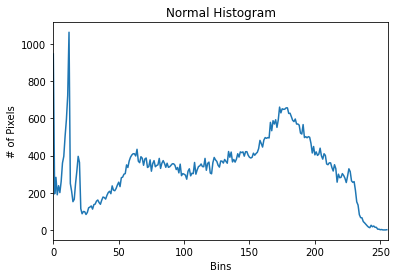

In [ ]:
from matplotlib import pyplot as plt
import cv2

gray = images_gray[0:383]
#gray = images_gray[0]
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Normal Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

(0.0, 256.0)

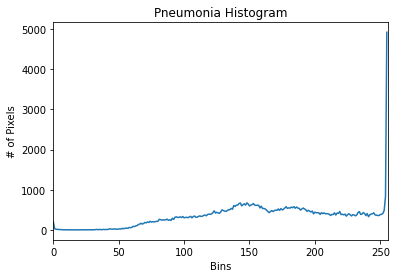

In [ ]:
gray = images_gray[383:766]
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Pneumonia Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

(0.0, 256.0)

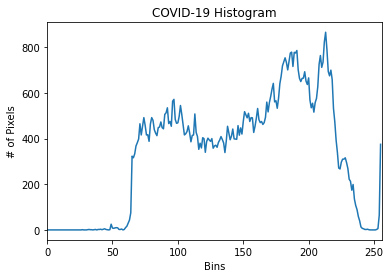

In [ ]:
gray = images_gray[766:1146]
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("COVID-19 Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])